<a href="https://colab.research.google.com/github/Devakumar08/ichneesan/blob/main/CNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
!git clone https://github.com/cuijiancorbin/EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN.git


Cloning into 'EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 36 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), 17.88 KiB | 1.79 MiB/s, done.


In [ ]:
%cd /content/EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN

/content/EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN


In [ ]:
!pwd

/content/EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!python3 "InterpretableCNN.py"

In [ ]:
!python3 "LeaveOneOut_acc.py"

Traceback (most recent call last):
  File "/content/EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN/LeaveOneOut_acc.py", line 143, in <module>
    run()
  File "/content/EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN/LeaveOneOut_acc.py", line 46, in run
    tmp = sio.loadmat(filename)
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 227, in loadmat
    matfile_dict = MR.get_variables(variable_names)
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio5.py", line 332, in get_variables
    res = self.read_var_array(hdr, process)
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio5.py", line 292, in read_var_array
    return self._matrix_reader.array_from_header(header, process)
  File "_mio5_utils.pyx", line 666, in scipy.io.matlab._mio5_utils.VarReader5.array_from_header
  File "_mio5_utils.pyx", line 695, in scipy.io.matlab._mio5_utils.VarReader5.array_from_he

In [ ]:
!pip install mne==0.19.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 3.8 MB/s eta 0:00:00


In [ ]:
!python3 VisTechnique.py

Traceback (most recent call last):
  File "/content/EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN/VisTechnique.py", line 347, in <module>
    run()
  File "/content/EEG-based-Cross-Subject-Driver-Drowsiness-Recognition-with-an-Interpretable-CNN/VisTechnique.py", line 278, in run
    tmp = sio.loadmat(filename)
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 227, in loadmat
    matfile_dict = MR.get_variables(variable_names)
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio5.py", line 332, in get_variables
    res = self.read_var_array(hdr, process)
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio5.py", line 292, in read_var_array
    return self._matrix_reader.array_from_header(header, process)
  File "_mio5_utils.pyx", line 666, in scipy.io.matlab._mio5_utils.VarReader5.array_from_header
  File "_mio5_utils.pyx", line 695, in scipy.io.matlab._mio5_utils.VarReader5.array_from_header


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

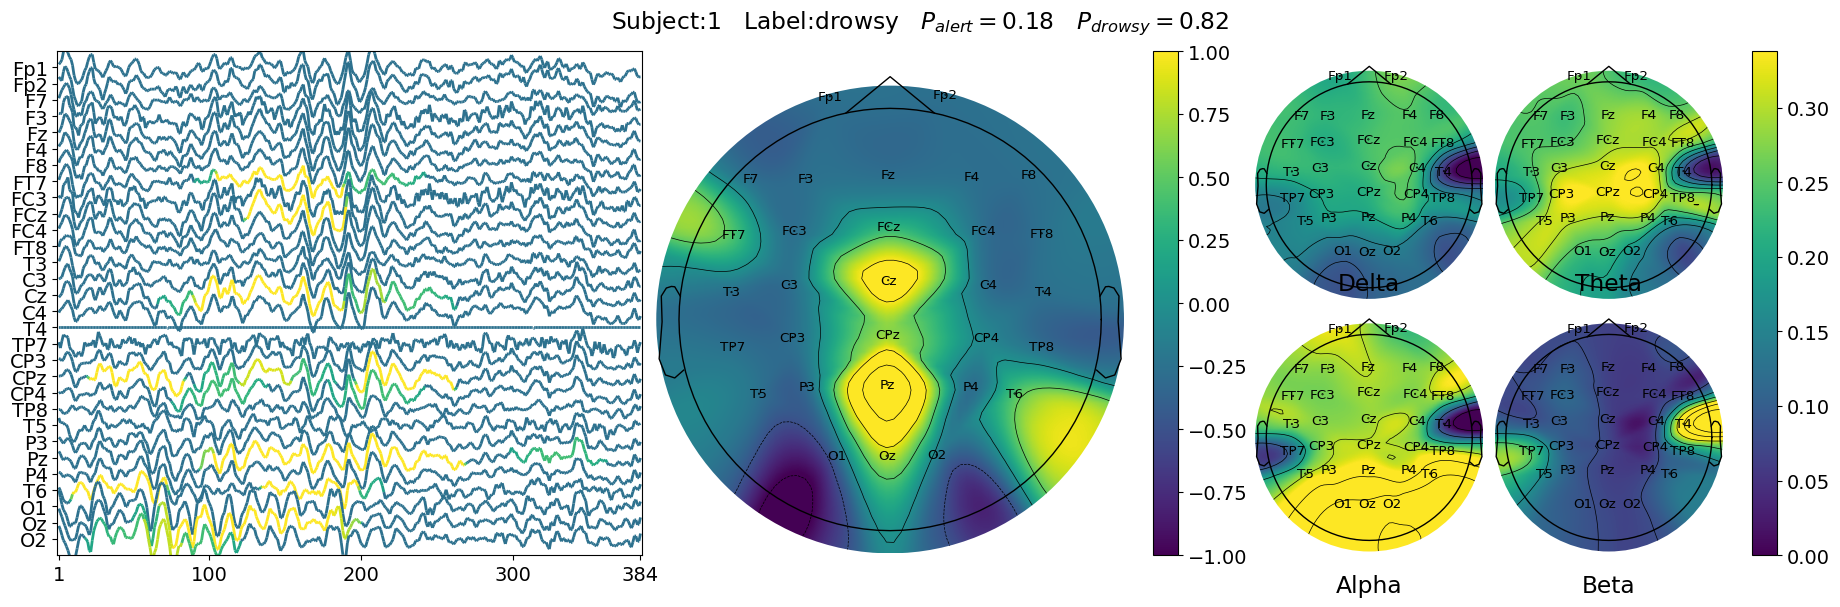

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  2 18:17:29 2019

@author: JIAN

This file implement the visualization technique proposed in the paper.
The extracted dataset is available from:
    https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset/14273687
if you have any problem on using the codes, pls contact Dr. Cui Jian at cuij0006@ntu.edu.sg
"""
import torch
import scipy.io as sio
import numpy as np
import torch.optim as optim
from scipy.integrate import simps
from mne.time_frequency import psd_array_multitaper
import mne
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.gridspec as gridspec
from InterpretableCNN import InterpretableCNN

torch.cuda.empty_cache()
torch.manual_seed(0)

plt.rcParams.update({'font.size': 14})

class VisTech():
    def __init__(self, model):
        self.model = model
        self.model.eval()

    def heatmap_calculation(self,batchInput,sampleidx,state,radius=32):
        """
        This function generates the heatmap with the visualization technique proposed in the paper.
        input:
           batchInput:          all the samples in a batch for classification
           sampleidx:           index of the sample
           subid:               ID of the subject
           state:               the classified state output by the classifier. 0--alert, 1--drowsy
           radius:              the influential radius of the Gaussian function. Default is 32, which is half the kernel size.
        """

        # to get the activations after the 4th layer
        batchActiv1=self.model.pointwise(batchInput)
        batchActiv2=self.model.depthwise(batchActiv1)
        batchActiv3=self.model.activ(batchActiv2)
        batchActiv4=self.model.batchnorm(batchActiv3)

        # to get the parameters of the network
        layer1weights=self.model.pointwise.weight.cpu().detach().numpy().squeeze()
        layer2weights=self.model.depthwise.weight.detach().cpu().numpy().squeeze()
        layer6weights=torch.transpose(self.model.fc.weight,0,1).cpu().detach().numpy().squeeze()

        # to get activations of the sample
        sampleInput=batchInput[sampleidx].cpu().detach().numpy().squeeze()
        sampleActiv2=batchActiv2[sampleidx].cpu().detach().numpy().squeeze()
        sampleActiv4=batchActiv4[sampleidx].cpu().detach().numpy().squeeze()

        # to get the dimensional of the input sample and the kernel length of the second layer
        sampleChannel=sampleInput.shape[0]
        sampleLength=sampleInput.shape[1]
        kernelLength=sampleLength-sampleActiv4.shape[1]+1

        #the class activation map
        CAM=sampleActiv4*np.tile(np.array([layer6weights[:,state]]).transpose(),(1,sampleActiv4.shape[1]))
        CAMsorted=np.sort(CAM,axis=None)

        #threshold of the class activation map
        CAMthres=CAMsorted[-100]

        # the fixationmap regesters locations of the discriminative points
        fixationmap=CAM>CAMthres

        #the activations after 2nd layer and those after 4th layer must have the same signs. Otherwise, you need to change the CAM threshold.
        for i in range(fixationmap.shape[0]):
            for j in range(fixationmap.shape[1]):
                if fixationmap[i,j]:
                    if sampleActiv4[i,j]*sampleActiv2[i,j]<0:
                        fixationmap[i,j]=False
                        print('error')

        # the corresponding discriminative locations for the input sample
        fixationmap0=np.zeros((sampleChannel,sampleLength))

        # find the corresponding discriminative locations for the input sample
        for i in range(fixationmap.shape[0]):
            for j in range(fixationmap.shape[1]):
                if fixationmap[i,j]:
                    #Implement equation (13) in the paper
                    sumvalue=np.sum(sampleInput[:,j:j+64]*np.tile(layer2weights[i,:],(sampleChannel,1)),axis=1)*layer1weights[int(np.floor(i/2)),:]
                    # implement equation (14) in the paper
                    p=np.argmax(sumvalue*np.sign(sampleActiv2[i,j]))
                    # implement equation (15) in the paper
                    q=j+int(kernelLength/2)

                    fixationmap0[p,q]=1

        # calculate the final heatmap
        heatmap=np.zeros((sampleChannel,sampleLength))
        for p in range(sampleChannel):
            for q in range(sampleLength):
                if fixationmap0[p,q]>0:

                    minbound=int(q-radius)
                    if minbound<0:
                        minbound=0

                    maxbound=int(q+radius)
                    if maxbound>sampleLength:
                        maxbound=sampleLength

                    for qk in range(minbound,maxbound):
                        # implement equation (12) in the paper
                        heatmap[p,qk]=heatmap[p,qk]+ 1 / radius/np.sqrt(2 * np.pi) *np.exp(-(qk-q)** 2/(2*radius*radius))

        # normalize the heatmap for visualization
        heatmap= (heatmap-np.mean(heatmap)) / np.sqrt(np.sum(heatmap**2)/(sampleChannel*sampleLength))

        return heatmap



    def generate_heatmap(self, batchInput,sampleidx,subid,samplelabel,likelihood):
        """
        This function generates figures shown in the figure
        input:
           batchInput:          all the samples in a batch for classification
           sampleidx:           the index of the sample
           subid:               the ID of the subject
           samplelabel:         the ground truth label of the sample
           likelihood:          the likelihood of the sample to be classified into alert and drowsy state
        """

        if likelihood[0]>likelihood[1]:
            state=0
        else:
            state=1

        if samplelabel==0:
            labelstr='alert'
        else:
            labelstr='drowsy'


        sampleInput=batchInput[sampleidx].cpu().detach().numpy().squeeze()
        sampleChannel=sampleInput.shape[0]
        sampleLength=sampleInput.shape[1]


        heatmap=self.heatmap_calculation(batchInput=batchInput,sampleidx=sampleidx,state=state)

        fig = plt.figure(figsize=(23,6))

        gridlayout = gridspec.GridSpec(ncols=6, nrows=2, figure=fig,wspace=0.05, hspace=0.005)

        axs0 = fig.add_subplot(gridlayout[0:2,0:2])
        axs1 = fig.add_subplot(gridlayout[0:2,2:4])
        axs21= fig.add_subplot(gridlayout[0,4])
        axs22= fig.add_subplot(gridlayout[0,5])
        axs23= fig.add_subplot(gridlayout[1,4])
        axs24= fig.add_subplot(gridlayout[1,5])


        fig.suptitle('Subject:'+str(int(subid))+'   '+'Label:'+labelstr+'   '+'$P_{alert}=$'+str(round(likelihood[0],2))+'   $P_{drowsy}=$'+str(round(likelihood[1],2)),y=1.02)
        thespan=np.percentile(sampleInput,98)

        xx=np.arange(1,sampleLength+1)
        for i in range(0,sampleChannel):
            y=sampleInput[i,:]+thespan*(sampleChannel-1-i)
            dydx=heatmap[i,:]

            points = np.array([xx, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            norm = plt.Normalize(-1, 1)
            lc = LineCollection(segments, cmap='viridis', norm=norm)
            lc.set_array(dydx)
            lc.set_linewidth(2)
            axs0.add_collection(lc)


        yttics=np.zeros(sampleChannel)
        for gi in range(sampleChannel):
            yttics[gi]=gi*thespan

        axs0.set_ylim([-thespan,thespan*sampleChannel])
        axs0.set_xlim([0,sampleLength+1])
        axs0.set_xticks([1,100,200,300,384])

        channelnames=['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT7', 'FC3', 'FCz', 'FC4', 'FT8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8','T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'Oz','O2']

        inversechannelnames=[]
        for i in range(sampleChannel):
            inversechannelnames.append(channelnames[sampleChannel-1-i])

        plt.sca(axs0)
        plt.yticks(yttics, inversechannelnames)

        deltapower=np.zeros(sampleChannel)
        thetapower=np.zeros(sampleChannel)
        alphapower=np.zeros(sampleChannel)
        betapower=np.zeros(sampleChannel)

        for kk in range(sampleChannel):
            psd, freqs = psd_array_multitaper(sampleInput[kk,:], 128, adaptive=True,normalization='full', verbose=0)
            freq_res = freqs[1] - freqs[0]

            totalpower=simps(psd, dx=freq_res)
            if totalpower<0.00000001:
               deltapower[kk]=0
               thetapower[kk]=0
               alphapower[kk]=0
               betapower[kk]=0
            else:
                idx_band = np.logical_and(freqs >= 1, freqs <= 4)
                deltapower[kk] = simps(psd[idx_band], dx=freq_res)/totalpower
                idx_band = np.logical_and(freqs >= 4, freqs <= 8)
                thetapower[kk]  = simps(psd[idx_band], dx=freq_res)/totalpower
                idx_band = np.logical_and(freqs >= 8, freqs <= 12)
                alphapower[kk]  = simps(psd[idx_band], dx=freq_res)/totalpower
                idx_band = np.logical_and(freqs >= 12, freqs <= 30)
                betapower[kk]  = simps(psd[idx_band], dx=freq_res)/totalpower

        axs21.set_title('Delta',y=0.0)
        axs22.set_title('Theta',y=0.0)
        axs23.set_title('Alpha',y=-0.2)
        axs24.set_title('Beta',y=-0.2)

        montage ='standard_1020'
        sfreq = 128

        ch_names=channelnames

        info = mne.create_info(
            channelnames,
            ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg'],
            sfreq=sfreq,
        )
        info.set_montage(montage)

        topoHeatmap = np.mean(heatmap, axis=1)
        im,cn=mne.viz.plot_topomap(data=topoHeatmap,pos=info, axes=axs1, names=ch_names,outlines='head',cmap='viridis',show=False)
        im.set_clim(vmin=-1, vmax=1)
        fig.colorbar(im,ax=axs1)

        mixpower=np.zeros((4,sampleChannel))
        mixpower[0,:]=deltapower
        mixpower[1,:]=thetapower
        mixpower[2,:]=alphapower
        mixpower[3,:]=betapower

        vmax=np.percentile(mixpower,95)

        im,cn=mne.viz.plot_topomap(data=deltapower,pos=info,axes=axs21, names=ch_names,outlines='head',cmap='viridis',show=False)
        im.set_clim(vmin=0, vmax=vmax)
        im,cn=mne.viz.plot_topomap(data=thetapower,pos=info, axes=axs22, names=ch_names,outlines='head',cmap='viridis',show=False)
        im.set_clim(vmin=0, vmax=vmax)
        im,cn=mne.viz.plot_topomap(data=alphapower,pos=info, axes=axs23, names=ch_names,outlines='head',cmap='viridis',show=False)
        im.set_clim(vmin=0, vmax=vmax)
        im,cn=mne.viz.plot_topomap(data=betapower,pos=info, axes=axs24, names=ch_names,outlines='head',cmap='viridis',show=False)
        im.set_clim(vmin=0, vmax=vmax)
        fig.colorbar(im,ax=[axs21,axs22,axs23,axs24])


def run():

    lr = 1e-3
    filename = r'dataset.mat'

    channelnum=30
    classes=2
    subjnum=11
    samplelength=3

    tmp = sio.loadmat(filename)
    xdata=np.array(tmp['EEGsample'])
    label=np.array(tmp['substate'])
    subIdx=np.array(tmp['subindex'])

    label.astype(int)
    subIdx.astype(int)

    samplenum=label.shape[0]
    sf=128
    ydata=np.zeros(samplenum,dtype=np.longlong)

    for i in range(samplenum):
        ydata[i]=label[i]

    batch_size = 50
    n_epoch =11

    for i in range(1,2):
        trainindx=np.where(subIdx != i)[0]
        xtrain=xdata[trainindx]
        x_train = xtrain.reshape(xtrain.shape[0],1,channelnum, samplelength*sf)

        y_train=ydata[trainindx]
        testindx=np.where(subIdx == i)[0]

        y_test=ydata[testindx]

        train = torch.utils.data.TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
        train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

        my_net = InterpretableCNN().double().cuda()
        optimizer = optim.Adam(my_net.parameters(), lr=lr)
        loss_class = torch.nn.NLLLoss().cuda()

        for p in my_net.parameters():
            p.requires_grad = True

        for epoch in range(n_epoch):
            for j, data in enumerate(train_loader, 0):
                inputs, labels = data

                input_data = inputs.cuda()
                class_label = labels.cuda()

                my_net.train()
                my_net.zero_grad()
                class_output= my_net(input_data)
                err_s_label = loss_class(class_output, class_label)
                err = err_s_label

                err.backward()
                optimizer.step()

        my_net.eval()
        with torch.no_grad():
            xtest=xdata[testindx]
            x_test = xtest.reshape(xtest.shape[0], 1,channelnum, samplelength*sf)
            x_test =  torch.DoubleTensor(x_test).cuda()
            answer = my_net(x_test)

            probs=np.exp(answer.cpu().numpy())
            sampleVis =VisTech(my_net)

            # you can change the sample you want to visualize here
            sampleidx=112
            sampleVis.generate_heatmap(batchInput=x_test,sampleidx=sampleidx,subid=i,samplelabel=y_test[sampleidx],likelihood=probs[sampleidx])

if __name__ == '__main__':
    run()


In [ ]:
import torch
import scipy.io as sio
import numpy as np
from sklearn.metrics import accuracy_score
import torch.optim as optim
from InterpretableCNN import InterpretableCNN

torch.cuda.empty_cache()
torch.manual_seed(0)

def run():
    # Load data from the file
    filename = r'dataset.mat'
    tmp = sio.loadmat(filename)
    xdata = np.array(tmp['EEGsample'])
    label = np.array(tmp['substate'])
    subIdx = np.array(tmp['subindex'])
    label = label.astype(int)
    subIdx = subIdx.astype(int)
    samplenum = label.shape[0]

    # Dataset properties
    channelnum = 30
    subjnum = 11
    samplelength = 3
    sf = 128

    # Hyperparameters
    lr = 1e-3
    batch_size = 50
    n_epoch = 11

    # Store accuracies of every subject
    results = np.zeros(subjnum)

    # Perform leave-one-subject-out training and classification
    for i in range(1, subjnum+1):
        # Form the training data
        trainindx = np.where(subIdx != i)[0]
        xtrain = xdata[trainindx]
        x_train = xtrain.reshape(xtrain.shape[0], 1, channelnum, samplelength*sf)
        y_train = ydata[trainindx]

        # Form the testing data
        testindx = np.where(subIdx == i)[0]
        xtest = xdata[testindx]
        x_test = xtest.reshape(xtest.shape[0], 1, channelnum, samplelength*sf)
        y_test = ydata[testindx]

        train = torch.utils.data.TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
        train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

        # Load the CNN model to deal with 1D EEG signals
        my_net = InterpretableCNN().double().cuda()
        optimizer = optim.Adam(my_net.parameters(), lr=lr)
        loss_class = torch.nn.NLLLoss().cuda()

        for p in my_net.parameters():
            p.requires_grad = True

        # Train the classifier
        for epoch in range(n_epoch):
            for j, data in enumerate(train_loader, 0):
                inputs, labels = data
                input_data = inputs.cuda()
                class_label = labels.cuda()
                my_net.zero_grad()
                my_net.train()
                class_output = my_net(input_data)
                err_s_label = loss_class(class_output, class_label)
                err = err_s_label
                err.backward()
                optimizer.step()

        # Test the results
        my_net.train(False)
        with torch.no_grad():
            x_test = torch.DoubleTensor(x_test).cuda()
            answer = my_net(x_test)
            probs = answer.cpu().numpy()
            preds = probs.argmax(axis=-1)
            acc = accuracy_score(y_test, preds)
            print(acc)
            results[i-1] = acc

    print('Mean accuracy:', np.mean(results))

if __name__ == '__main__':
    run()



ModuleNotFoundError: ignored

0.8563829787234043
0.696969696969697
0.7866666666666666
0.7837837837837838
0.8794642857142857
0.8433734939759037
0.6666666666666666
0.7878787878787878
0.89171974522293
0.7314814814814815
0.6592920353982301
mean accuracy: 0.7803345111347126


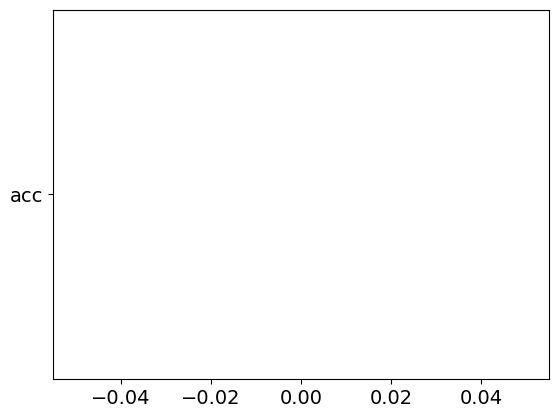

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  2 18:17:29 2019

@author: JIAN
"""
import torch
import scipy.io as sio
import numpy as np
from sklearn.metrics import accuracy_score
import torch.optim as optim
from InterpretableCNN import InterpretableCNN

torch.cuda.empty_cache()
torch.manual_seed(0)

"""
 This file performs leave-one-subject cross-subject classification on the driver drowsiness dataset.
 The data file contains 3 variables and they are EEGsample, substate and subindex.
 "EEGsample" contains 2022 EEG samples of size 30x384 from 11 subjects.
 Each sample is a 3s EEG data with 128Hz from 30 EEG channels.

 The names and their corresponding index are shown below:
 Fp1, Fp2, F7, F3, Fz, F4, F8, FT7, FC3, FCZ, FC4, FT8, T3, C3, Cz, C4, T4, TP7, CP3, CPz, CP4, TP8, T5, P3, PZ, P4, T6, O1, Oz  O2
 0,    1,  2,  3,  4,  5,  6,  7,   8,   9,   10,   11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21,  22,  23,24, 25, 26, 27, 28, 29

 "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
 "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

  The dataset can be downloaded here:
  https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset/14273687

  This file prints leave-one-out accuracies for each subject and the overall accuracy.
  The overall accuracy for one run is around 0.78

  If you have met any problems, you can contact Dr. Cui Jian at cuij0006@ntu.edu.sg
"""

def run():

#    load data from the file

    filename = r'dataset.mat'


    tmp = sio.loadmat(filename)
    xdata=np.array(tmp['EEGsample'])
    label=np.array(tmp['substate'])
    subIdx=np.array(tmp['subindex'])

    label.astype(int)
    subIdx.astype(int)

    samplenum=label.shape[0]

#   there are 11 subjects in the dataset. Each sample is 3-seconds data from 30 channels with sampling rate of 128Hz.
    channelnum=30
    subjnum=11
    samplelength=3
    sf=128

#   define the learning rate, batch size and epoches
    lr=1e-3
    batch_size = 50
    n_epoch =11

#   ydata contains the label of samples
    ydata=np.zeros(samplenum,dtype=np.longlong)

    for i in range(samplenum):
        ydata[i]=label[i]

#   the result stores accuracies of every subject
    results=np.zeros(subjnum)



#   it performs leave-one-subject-out training and classfication
#   for each iteration, the subject i is the testing subject while all the other subjects are the training subjects.
    for i in range(1,subjnum+1):

#       form the training data
        trainindx=np.where(subIdx != i)[0]
        xtrain=xdata[trainindx]
        x_train = xtrain.reshape(xtrain.shape[0],1,channelnum, samplelength*sf)
        y_train=ydata[trainindx]


#       form the testing data
        testindx=np.where(subIdx == i)[0]
        xtest=xdata[testindx]
        x_test = xtest.reshape(xtest.shape[0], 1,channelnum, samplelength*sf)
        y_test=ydata[testindx]


        train = torch.utils.data.TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
        train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

#       load the CNN model to deal with 1D EEG signals
        my_net = InterpretableCNN().double().cuda()


        optimizer = optim.Adam(my_net.parameters(), lr=lr)
        loss_class = torch.nn.NLLLoss().cuda()

        for p in my_net.parameters():
            p.requires_grad = True

#        train the classifier
        for epoch in range(n_epoch):
            for j, data in enumerate(train_loader, 0):
                inputs, labels = data

                input_data = inputs.cuda()
                class_label = labels.cuda()

                my_net.zero_grad()
                my_net.train()

                class_output= my_net(input_data)
                err_s_label = loss_class(class_output, class_label)
                err = err_s_label

                err.backward()
                optimizer.step()

#       test the results
        my_net.train(False)
        with torch.no_grad():
            x_test =  torch.DoubleTensor(x_test).cuda()
            answer = my_net(x_test)
            probs=answer.cpu().numpy()
            preds       = probs.argmax(axis = -1)
            acc=accuracy_score(y_test, preds)

            print(acc)
            results[i-1]=acc

    plt.plot('acc')
    print('mean accuracy:',np.mean(results))

if __name__ == '__main__':
    run()



DigMontage is a superset of info. 64 in DigMontage will be ignored. The ignored channels are: {'P8', 'C6', 'AF5', 'F9', 'TP10', 'O9', 'A1', 'F10', 'T9', 'PO5', 'PO4', 'A2', 'FT9', 'FC1', 'CP1', 'FT10', 'PO1', 'F6', 'P9', 'FC2', 'F2', 'FC6', 'AF7', 'AF2', 'P7', 'PO10', 'POz', 'P10', 'P5', 'C2', 'C5', 'CP5', 'PO2', 'C1', 'PO7', 'P1', 'Iz', 'CP2', 'AF9', 'AF8', 'AF10', 'F5', 'AF6', 'M1', 'T7', 'M2', 'FC5', 'PO8', 'AFz', 'O10', 'T10', 'F1', 'TP9', 'AF3', 'CP6', 'PO6', 'P2', 'P6', 'Fpz', 'AF4', 'PO3', 'PO9', 'AF1', 'T8'}


/usr/local/lib/python3.10/dist-packages/mne/io/meas_info.py:1769: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ch_types = np.atleast_1d(np.array(ch_types, np.str))
/usr/local/lib/python3.10/dist-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/usr/local/lib/python3.10/dist-packages/mne/i

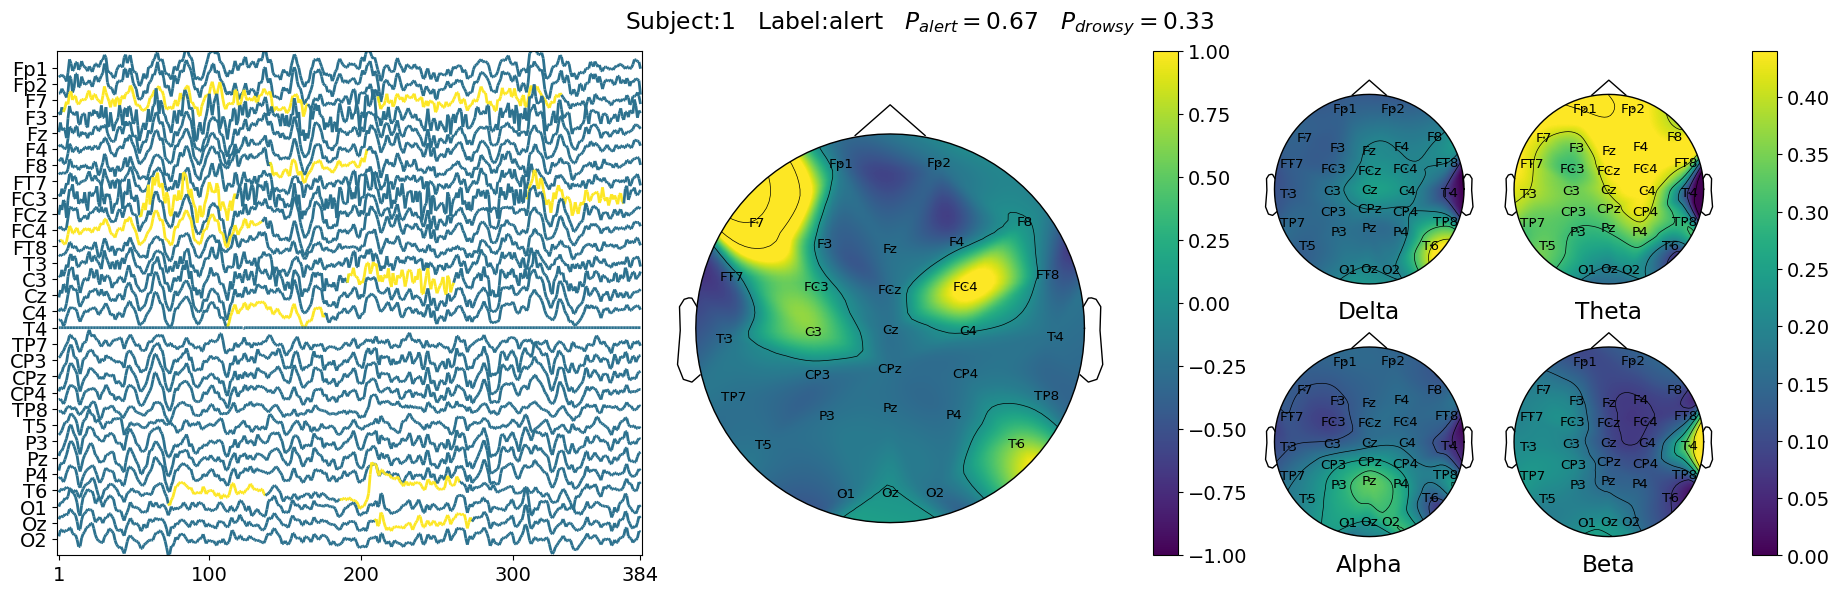

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  2 18:17:29 2019

@author: JIAN

This file implement the visualization technique proposed in the paper.
The extracted dataset is available from:
    https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset/14273687
if you have any problem on using the codes, pls contact Dr. Cui Jian at cuij0006@ntu.edu.sg
"""
import torch
import scipy.io as sio
import numpy as np
import torch.optim as optim
from scipy.integrate import simps
from mne.time_frequency import psd_array_multitaper
import mne
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.gridspec as gridspec
from InterpretableCNN import InterpretableCNN

torch.cuda.empty_cache()
torch.manual_seed(0)

plt.rcParams.update({'font.size': 14})

class VisTech():
    def __init__(self, model):
        self.model = model
        self.model.eval()

    def heatmap_calculation(self,batchInput,sampleidx,state,radius=32):
        """
        This function generates the heatmap with the visualization technique proposed in the paper.
        input:
           batchInput:          all the samples in a batch for classification
           sampleidx:           index of the sample
           subid:               ID of the subject
           state:               the classified state output by the classifier. 0--alert, 1--drowsy
           radius:              the influential radius of the Gaussian function. Default is 32, which is half the kernel size.
        """

        # to get the activations after the 4th layer
        batchActiv1=self.model.pointwise(batchInput)
        batchActiv2=self.model.depthwise(batchActiv1)
        batchActiv3=self.model.activ(batchActiv2)
        batchActiv4=self.model.batchnorm(batchActiv3)

        # to get the parameters of the network
        layer1weights=self.model.pointwise.weight.cpu().detach().numpy().squeeze()
        layer2weights=self.model.depthwise.weight.detach().cpu().numpy().squeeze()
        layer6weights=torch.transpose(self.model.fc.weight,0,1).cpu().detach().numpy().squeeze()

        # to get activations of the sample
        sampleInput=batchInput[sampleidx].cpu().detach().numpy().squeeze()
        sampleActiv2=batchActiv2[sampleidx].cpu().detach().numpy().squeeze()
        sampleActiv4=batchActiv4[sampleidx].cpu().detach().numpy().squeeze()

        # to get the dimensional of the input sample and the kernel length of the second layer
        sampleChannel=sampleInput.shape[0]
        sampleLength=sampleInput.shape[1]
        kernelLength=sampleLength-sampleActiv4.shape[1]+1

        #the class activation map
        CAM=sampleActiv4*np.tile(np.array([layer6weights[:,state]]).transpose(),(1,sampleActiv4.shape[1]))
        CAMsorted=np.sort(CAM,axis=None)

        #threshold of the class activation map
        CAMthres=CAMsorted[-100]

        # the fixationmap regesters locations of the discriminative points
        fixationmap=CAM>CAMthres

        #the activations after 2nd layer and those after 4th layer must have the same signs. Otherwise, you need to change the CAM threshold.
        for i in range(fixationmap.shape[0]):
            for j in range(fixationmap.shape[1]):
                if fixationmap[i,j]:
                    if sampleActiv4[i,j]*sampleActiv2[i,j]<0:
                        fixationmap[i,j]=False
                        print('error')

        # the corresponding discriminative locations for the input sample
        fixationmap0=np.zeros((sampleChannel,sampleLength))

        # find the corresponding discriminative locations for the input sample
        for i in range(fixationmap.shape[0]):
            for j in range(fixationmap.shape[1]):
                if fixationmap[i,j]:
                    #Implement equation (13) in the paper
                    sumvalue=np.sum(sampleInput[:,j:j+64]*np.tile(layer2weights[i,:],(sampleChannel,1)),axis=1)*layer1weights[int(np.floor(i/2)),:]
                    # implement equation (14) in the paper
                    p=np.argmax(sumvalue*np.sign(sampleActiv2[i,j]))
                    # implement equation (15) in the paper
                    q=j+int(kernelLength/2)

                    fixationmap0[p,q]=1

        # calculate the final heatmap
        heatmap=np.zeros((sampleChannel,sampleLength))
        for p in range(sampleChannel):
            for q in range(sampleLength):
                if fixationmap0[p,q]>0:

                    minbound=int(q-radius)
                    if minbound<0:
                        minbound=0

                    maxbound=int(q+radius)
                    if maxbound>sampleLength:
                        maxbound=sampleLength

                    for qk in range(minbound,maxbound):
                        # implement equation (12) in the paper
                        heatmap[p,qk]=heatmap[p,qk]+ 1 / radius/np.sqrt(2 * np.pi) *np.exp(-(qk-q)** 2/(2*radius*radius))

        # normalize the heatmap for visualization
        heatmap= (heatmap-np.mean(heatmap)) / np.sqrt(np.sum(heatmap**2)/(sampleChannel*sampleLength))

        return heatmap



    def generate_heatmap(self, batchInput,sampleidx,subid,samplelabel,likelihood):
        """
        This function generates figures shown in the figure
        input:
           batchInput:          all the samples in a batch for classification
           sampleidx:           the index of the sample
           subid:               the ID of the subject
           samplelabel:         the ground truth label of the sample
           likelihood:          the likelihood of the sample to be classified into alert and drowsy state
        """

        if likelihood[0]>likelihood[1]:
            state=0
        else:
            state=1

        if samplelabel==0:
            labelstr='alert'
        else:
            labelstr='drowsy'


        sampleInput=batchInput[sampleidx].cpu().detach().numpy().squeeze()
        sampleChannel=sampleInput.shape[0]
        sampleLength=sampleInput.shape[1]


        heatmap=self.heatmap_calculation(batchInput=batchInput,sampleidx=sampleidx,state=state)

        fig = plt.figure(figsize=(23,6))

        gridlayout = gridspec.GridSpec(ncols=6, nrows=2, figure=fig,wspace=0.05, hspace=0.005)

        axs0 = fig.add_subplot(gridlayout[0:2,0:2])
        axs1 = fig.add_subplot(gridlayout[0:2,2:4])
        axs21= fig.add_subplot(gridlayout[0,4])
        axs22= fig.add_subplot(gridlayout[0,5])
        axs23= fig.add_subplot(gridlayout[1,4])
        axs24= fig.add_subplot(gridlayout[1,5])


        fig.suptitle('Subject:'+str(int(subid))+'   '+'Label:'+labelstr+'   '+'$P_{alert}=$'+str(round(likelihood[0],2))+'   $P_{drowsy}=$'+str(round(likelihood[1],2)),y=1.02)
        thespan=np.percentile(sampleInput,98)

        xx=np.arange(1,sampleLength+1)
        for i in range(0,sampleChannel):
            y=sampleInput[i,:]+thespan*(sampleChannel-1-i)
            dydx=heatmap[i,:]

            points = np.array([xx, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            norm = plt.Normalize(-1, 1)
            lc = LineCollection(segments, cmap='viridis', norm=norm)
            lc.set_array(dydx)
            lc.set_linewidth(2)
            axs0.add_collection(lc)


        yttics=np.zeros(sampleChannel)
        for gi in range(sampleChannel):
            yttics[gi]=gi*thespan

        axs0.set_ylim([-thespan,thespan*sampleChannel])
        axs0.set_xlim([0,sampleLength+1])
        axs0.set_xticks([1,100,200,300,384])

        channelnames=['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT7', 'FC3', 'FCz', 'FC4', 'FT8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8','T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'Oz','O2']

        inversechannelnames=[]
        for i in range(sampleChannel):
            inversechannelnames.append(channelnames[sampleChannel-1-i])

        plt.sca(axs0)
        plt.yticks(yttics, inversechannelnames)

        deltapower=np.zeros(sampleChannel)
        thetapower=np.zeros(sampleChannel)
        alphapower=np.zeros(sampleChannel)
        betapower=np.zeros(sampleChannel)

        for kk in range(sampleChannel):
            psd, freqs = psd_array_multitaper(sampleInput[kk,:], 128, adaptive=True,normalization='full', verbose=0)
            freq_res = freqs[1] - freqs[0]

            totalpower=simps(psd, dx=freq_res)
            if totalpower<0.00000001:
               deltapower[kk]=0
               thetapower[kk]=0
               alphapower[kk]=0
               betapower[kk]=0
            else:
                idx_band = np.logical_and(freqs >= 1, freqs <= 4)
                deltapower[kk] = simps(psd[idx_band], dx=freq_res)/totalpower
                idx_band = np.logical_and(freqs >= 4, freqs <= 8)
                thetapower[kk]  = simps(psd[idx_band], dx=freq_res)/totalpower
                idx_band = np.logical_and(freqs >= 8, freqs <= 12)
                alphapower[kk]  = simps(psd[idx_band], dx=freq_res)/totalpower
                idx_band = np.logical_and(freqs >= 12, freqs <= 30)
                betapower[kk]  = simps(psd[idx_band], dx=freq_res)/totalpower

        axs21.set_title('Delta',y=-0.2)
        axs22.set_title('Theta',y=-0.2)
        axs23.set_title('Alpha',y=-0.2)
        axs24.set_title('Beta',y=-0.2)

        montage ='standard_1020'
        sfreq = 128

        ch_names=channelnames

        info = mne.create_info(
            channelnames,
            ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg',\
                      'eeg', 'eeg', 'eeg', 'eeg', 'eeg'],
            sfreq=sfreq,
            montage=montage
        )


        topoHeatmap = np.mean(heatmap, axis=1)
        im,cn=mne.viz.plot_topomap(data=topoHeatmap,pos=info, vmin=-1, vmax=1, axes=axs1, names=ch_names,show_names=True,outlines='head',cmap='viridis',show=False)
        fig.colorbar(im,ax=axs1)

        mixpower=np.zeros((4,sampleChannel))
        mixpower[0,:]=deltapower
        mixpower[1,:]=thetapower
        mixpower[2,:]=alphapower
        mixpower[3,:]=betapower

        vmax=np.percentile(mixpower,95)

        im,cn=mne.viz.plot_topomap(data=deltapower,pos=info, vmin=0, vmax=vmax, axes=axs21, names=ch_names,show_names=True,outlines='head',cmap='viridis',show=False)
        im,cn=mne.viz.plot_topomap(data=thetapower,pos=info, vmin=0, vmax=vmax, axes=axs22, names=ch_names,show_names=True,outlines='head',cmap='viridis',show=False)
        im,cn=mne.viz.plot_topomap(data=alphapower,pos=info, vmin=0, vmax=vmax, axes=axs23, names=ch_names,show_names=True,outlines='head',cmap='viridis',show=False)
        im,cn=mne.viz.plot_topomap(data=betapower,pos=info, vmin=0, vmax=vmax, axes=axs24, names=ch_names,show_names=True,outlines='head',cmap='viridis',show=False)

        fig.colorbar(im,ax=[axs21,axs22,axs23,axs24])


def run():

    lr = 1e-3
    filename = r'dataset.mat'

    channelnum=30
    classes=2
    subjnum=11
    samplelength=3

    tmp = sio.loadmat(filename)
    xdata=np.array(tmp['EEGsample'])
    label=np.array(tmp['substate'])
    subIdx=np.array(tmp['subindex'])

    label.astype(int)
    subIdx.astype(int)

    samplenum=label.shape[0]
    sf=128
    ydata=np.zeros(samplenum,dtype=np.longlong)

    for i in range(samplenum):
        ydata[i]=label[i]

    batch_size = 50
    n_epoch =11

    for i in range(1,2):
        trainindx=np.where(subIdx != i)[0]
        xtrain=xdata[trainindx]
        x_train = xtrain.reshape(xtrain.shape[0],1,channelnum, samplelength*sf)

        y_train=ydata[trainindx]
        testindx=np.where(subIdx == i)[0]

        y_test=ydata[testindx]

        train = torch.utils.data.TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
        train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

        my_net = InterpretableCNN().double().cuda()
        optimizer = optim.Adam(my_net.parameters(), lr=lr)
        loss_class = torch.nn.NLLLoss().cuda()

        for p in my_net.parameters():
            p.requires_grad = True

        for epoch in range(n_epoch):
            for j, data in enumerate(train_loader, 0):
                inputs, labels = data

                input_data = inputs.cuda()
                class_label = labels.cuda()

                my_net.train()
                my_net.zero_grad()
                class_output= my_net(input_data)
                err_s_label = loss_class(class_output, class_label)
                err = err_s_label

                err.backward()
                optimizer.step()

        my_net.eval()
        with torch.no_grad():
            xtest=xdata[testindx]
            x_test = xtest.reshape(xtest.shape[0], 1,channelnum, samplelength*sf)
            x_test =  torch.DoubleTensor(x_test).cuda()
            answer = my_net(x_test)

            probs=np.exp(answer.cpu().numpy())
            sampleVis =VisTech(my_net)

            # you can change the sample you want to visualize here
            sampleidx=61
            sampleVis.generate_heatmap(batchInput=x_test,sampleidx=sampleidx,subid=i,samplelabel=y_test[sampleidx],likelihood=probs[sampleidx])

if __name__ == '__main__':
    run()

